<a href="https://colab.research.google.com/github/jyimz/Python_Data_Projects/blob/main/Detecting_Vandalism_on_Wikipedia_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = 'Wikipedia.csv'
df = pd.read_csv(df)

df.head()

,Vandal,Minor,LoggedIn,HTTP,NumWordsAdded,NumWordsRemoved
0,0,1,1,1,96,0
1,0,1,1,0,3,1
2,0,0,1,0,0,4
3,0,1,0,0,10,92
4,0,1,1,1,94,10


In [ ]:
# Counting the number of cases of vandalism
num_vandalism_cases = df['Vandal'].sum()
num_vandalism_cases

1815

a)

i)

How many cases of vandalism were detected in the history of this page?

1815

In [ ]:
# Calculating the average number of words
average_words_added = df['NumWordsAdded'].mean()
average_words_removed = df['NumWordsRemoved'].mean()

average_words_added, average_words_removed


(4.050051599587204, 3.5128998968008256)

ii)

What is the average number of words that were added?
4.05

What is the average number of words that were removed?
3.51

In [ ]:
correlation_with_vandal = df.corr()['Vandal'].sort_values()
correlation_with_vandal

LoggedIn          -0.429255
Minor             -0.213995
NumWordsAdded     -0.000729
NumWordsRemoved    0.036360
HTTP               0.151554
Vandal             1.000000
Name: Vandal, dtype: float64

iii)

Which variable is the most correlated (positively or negatively) with the variable Vandal?

HTTP shows the highest positive correlation with Vandal, with a correlation value of approximately 0.1516.

LoggedIn is the most negatively correlated with Vandal, having a correlation value of approximately -0.4293.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size= 0.3, random_state= 42, stratify = df['Vandal'])

# Output the sizes of the training and testing sets
print(f"Training set size: {len(train_data)}")
print(f"Testing set size: {len(test_data)}")

Training set size: 2713
Testing set size: 1163


In [ ]:
# Extracting the 'Vandal' column from the test set
vandal_column_test = df['Vandal']

# Since the baseline model always predicts 'not vandalism', we count the number of non-vandalism cases
# These are correctly predicted by the baseline model
correct_predictions = vandal_column_test.value_counts().get(0, 0)

# Total number of predictions is the size of the test set
total_predictions = len(df)

# Calculating accuracy
accuracy_baseline = correct_predictions / total_predictions

# Print the accuracy
print(f"Accuracy of baseline model: {accuracy_baseline:.2f}")

Accuracy of baseline model: 0.53


b)

Now, randomly split the data into a training set and a testing set.

You should put 70% of the data in the training set. What is the accuracy on the testing set of a simple baseline method that always predicts "not vandalism" for every edit?

Accuracy: 53%

In [ ]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score

# Preparing the training data
X = df.drop(['Vandal'], axis = 1)
y = df['Vandal']

from sklearn.model_selection import train_test_split
X_train_1, X_val, y_train_1, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify = df['Vandal'])


In [ ]:
from sklearn.tree import DecisionTreeClassifier
ctree_10 = DecisionTreeClassifier(min_samples_leaf = 10)
ctree_10.fit(X_train_1, y_train_1)

DecisionTreeClassifier(min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ctree_50 = DecisionTreeClassifier(min_samples_leaf = 50)
ctree_50.fit(X_train_1, y_train_1)

DecisionTreeClassifier(min_samples_leaf=50)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ctree_100 = DecisionTreeClassifier(min_samples_leaf = 100)
ctree_100.fit(X_train_1, y_train_1)

DecisionTreeClassifier(min_samples_leaf=100)

In [ ]:
y_pred_test = ctree_10.predict(X_val)
ctree_10.predict_proba(X_val)[:,1]
print(pd.crosstab(y_val, y_pred_test))
accuracy_ctree_10 = (508 + 310) / (508 + 235 + 110 + 310)

col_0     0    1
Vandal          
0       508  110
1       235  310


In [ ]:
y_pred_test = ctree_50.predict(X_val)
ctree_50.predict_proba(X_val)[:,1]
print(pd.crosstab(y_val, y_pred_test))
accuracy_ctree_50 = (529 + 313) / (529 + 232 + 89 + 313)

col_0     0    1
Vandal          
0       529   89
1       232  313


In [ ]:
y_pred_test = ctree_100.predict(X_val)
ctree_100.predict_proba(X_val)[:,1]
print(pd.crosstab(y_val, y_pred_test))
accuracy_ctree_100 = (542 + 314) / (542 + 231 + 76 + 314)

col_0     0    1
Vandal          
0       542   76
1       231  314


In [ ]:
print(accuracy_ctree_10)
print(accuracy_ctree_50)
print(accuracy_ctree_100)

0.70335339638865
0.7239896818572656
0.7360275150472915


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_1, y_train_1)
y_pred = rf_model.predict(X_val)
accuracy_forest_model = accuracy_score(y_val, y_pred)
print(accuracy_forest_model)

0.7136715391229579


c)

i)

These variables included Vandal, LoggedIn, NumWordsAdded, NumWordsRemoved, and Minor. NumWordsAdded and NumWordsRemoved are the most significant variable.


ii).

Accuracy of CART model: 0.7360275150472915


[Text(0.3701923076923077, 0.9285714285714286, 'LoggedIn <= 0.5\ngini = 0.498\nsamples = 2713\nvalue = [1443, 1270]\nclass = Not Vandal'),
 Text(0.15384615384615385, 0.7857142857142857, 'NumWordsAdded <= 0.5\ngini = 0.348\nsamples = 895\nvalue = [201, 694]\nclass = Vandal'),
 Text(0.07692307692307693, 0.6428571428571429, 'NumWordsRemoved <= 0.5\ngini = 0.5\nsamples = 290\nvalue = [144, 146]\nclass = Vandal'),
 Text(0.038461538461538464, 0.5, 'gini = 0.496\nsamples = 181\nvalue = [99, 82]\nclass = Not Vandal'),
 Text(0.11538461538461539, 0.5, 'gini = 0.485\nsamples = 109\nvalue = [45, 64]\nclass = Vandal'),
 Text(0.23076923076923078, 0.6428571428571429, 'NumWordsRemoved <= 0.5\ngini = 0.171\nsamples = 605\nvalue = [57, 548]\nclass = Vandal'),
 Text(0.19230769230769232, 0.5, 'NumWordsAdded <= 5.5\ngini = 0.126\nsamples = 401\nvalue = [27, 374]\nclass = Vandal'),
 Text(0.15384615384615385, 0.35714285714285715, 'NumWordsAdded <= 1.5\ngini = 0.135\nsamples = 301\nvalue = [22, 279]\nclass = V

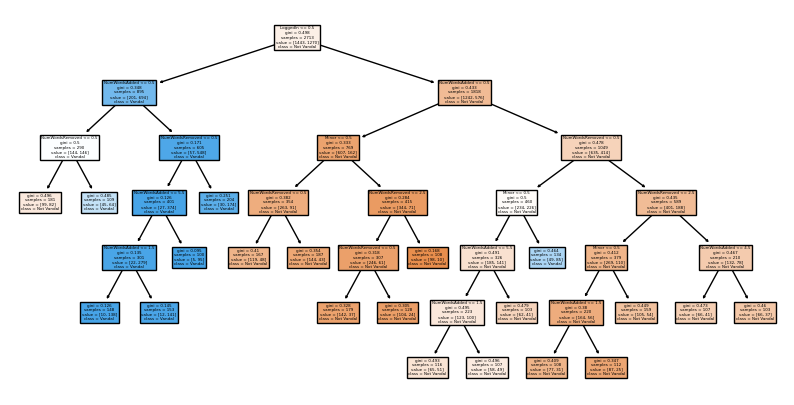

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plot_tree(ctree_100, feature_names=X.columns, class_names=["Not Vandal","Vandal"], filled=True)

d)

The Accuracy for

The Random Forest is: 0.7136715391229579

The CART model's: 0.7360275150472915.

e)

i)

The model achieved an accuracy of approximately 74%. While this is significantly better than random guessing or the simple baseline model, it's not exceptionally high. In practical terms, this means the model will correctly identify vandalism in about three-quarters of cases but may also miss or falsely label some edits.The CART model shows promise and could be a useful tool in detecting vandalism on Wikipedia, its real-world effectiveness would depend on the factors mentioned above.

ii)

Information about the user’s past editing behavior, such as the number of previous edits, the frequency of their edits, and their history of vandalism (if any), can be very informative.

How often an editor's contributions are reverted by others can be a strong indicator of the quality of their edits.

Analyzing the actual textual changes in an edit, such as the insertion of inappropriate language, removal of large content sections, or alterations that change the meaning, could be crucial.

By incorporating these additional variables, the model could gain a much richer context for each edit, improving its ability to accurately detect vandalism.

iii)

Different Wikipedia pages might have varying levels of vulnerability to vandalism. The model trained on data from a single page might not generalize well across different topics. Each Wikipedia page might have its unique editing patterns and community norms. Models trained on more diverse data sets, encompassing various topics, editing styles, and vandalism types, tend to generalize better. A model trained on a single page lacks this diversity. In conclusion, while the model might provide some insights or baseline performance when applied to other pages, its effectiveness is likely to be limited.